In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import tensorflow as tf
# import pickle
# import logging
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Set up logging for debugging
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# logging.info("Loading dataset...")
# df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])  # Updated filename
# df = df.sort_values(by="From Date")  # Ensure chronological order

# # Define pollutants, meteorological features, and AQI
# pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
# meteorological_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
# all_features = pollutants + meteorological_features
# target = "AQI"

# # Sanity Check: Count missing values
# missing_values = df[all_features + [target]].isnull().sum()
# logging.info(f"Missing values before interpolation:\n{missing_values}")

# # Fill missing values using linear interpolation
# df[all_features + [target]] = df[all_features + [target]].interpolate(method="linear")

# # Normalize data for LSTM
# scaler = MinMaxScaler()
# df[all_features + [target]] = scaler.fit_transform(df[all_features + [target]])

# logging.info("Data preprocessing completed. Starting model training...")

# # Create training datasets
# X = df[all_features].values
# y = df[target].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Train XGBoost Model for AQI Prediction
# logging.info("Training XGBoost model for AQI...")
# xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
# xgb_model.fit(X_train, y_train)

# # Predict AQI using XGBoost
# xgb_predictions = xgb_model.predict(X_test)

# # Train XGBoost Models for Individual Pollutants
# xgb_pollutant_models = {}
# xgb_pollutant_predictions = {}

# for pollutant in pollutants:
#     logging.info(f"Training XGBoost model for {pollutant}...")
#     xgb_pollutant_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
#     xgb_pollutant_model.fit(X_train, df[pollutant].values)
#     xgb_pollutant_models[pollutant] = xgb_pollutant_model
#     xgb_pollutant_predictions[pollutant] = xgb_pollutant_model.predict(X_test)

# logging.info("All pollutant models trained successfully.")

# # Prepare LSTM Data for AQI Forecasting
# def create_sequences(data, seq_length):
#     sequences, labels = [], []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i + seq_length]
#         label = data[i + seq_length]
#         sequences.append(seq)
#         labels.append(label)
#     return np.array(sequences), np.array(labels)

# seq_length = 10  # Use past 10 days to predict next day
# X_lstm, y_lstm = create_sequences(df[all_features].values, seq_length)

# X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# # Build LSTM Model for AQI Prediction
# logging.info("Training LSTM model for AQI...")
# lstm_model = Sequential([
#     LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, len(all_features))),
#     Dropout(0.2),
#     LSTM(30, activation='relu'),
#     Dense(1)
# ])

# lstm_model.compile(optimizer='adam', loss='mse')
# history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, validation_data=(X_test_lstm, y_test_lstm))

# logging.info("LSTM model training completed.")

# # Save Models in PKL Format
# logging.info("Saving models in PKL format...")

# # Save XGBoost AQI Model
# with open("xgb_aqi_model.pkl", "wb") as f:
#     pickle.dump(xgb_model, f)

# # Save XGBoost Pollutant Models
# for pollutant, model in xgb_pollutant_models.items():
#     with open(f"xgb_{pollutant}_model.pkl", "wb") as f:
#         pickle.dump(model, f)

# # Save LSTM Model in PKL Format (Convert Model to ByteStream First)
# with open("lstm_aqi_model.pkl", "wb") as f:
#     pickle.dump(lstm_model.to_json(), f)

# logging.info("All models saved in PKL format successfully.")

# # Save predictions to CSV
# predictions_df = pd.DataFrame({
#     "XGBoost_AQI": xgb_predictions, 
#     "LSTM_AQI": lstm_model.predict(X_test_lstm).flatten(), 
#     **xgb_pollutant_predictions
# })
# predictions_df.to_csv("aqi_pollutant_predictions.csv", index=False)

# logging.info("AQI & pollutant forecasts saved successfully!")


C:\Users\kisho\AppData\Local\Temp\ipykernel_16252\3676748954.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data_imputed.csv", parse_dates=["From Date"])


Training model for PM2.5...


16:51:12 - cmdstanpy - INFO - Chain [1] start processing
17:04:54 - cmdstanpy - INFO - Chain [1] done processing


Training model for PM10...


17:06:30 - cmdstanpy - INFO - Chain [1] start processing
17:20:47 - cmdstanpy - INFO - Chain [1] done processing


Training model for NO...


17:22:29 - cmdstanpy - INFO - Chain [1] start processing
17:28:58 - cmdstanpy - INFO - Chain [1] done processing


Training model for NO2...


17:30:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:27 - cmdstanpy - INFO - Chain [1] done processing


Training model for NOx...


17:39:04 - cmdstanpy - INFO - Chain [1] start processing
17:51:15 - cmdstanpy - INFO - Chain [1] done processing


Training model for NH3...


17:52:52 - cmdstanpy - INFO - Chain [1] start processing
18:03:09 - cmdstanpy - INFO - Chain [1] done processing


Training model for SO2...


18:04:56 - cmdstanpy - INFO - Chain [1] start processing
18:08:39 - cmdstanpy - INFO - Chain [1] done processing


Training model for CO...


18:09:40 - cmdstanpy - INFO - Chain [1] start processing


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
import pickle
import gc  # For garbage collection to free up memory
import logging
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Set up logging for progress and debugging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ------------------------------------------------------------------------------
# 1. DATA LOADING AND PREPROCESSING
logging.info("Loading dataset from 'merged_data_imputed_revised.csv'...")
df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])
df = df.sort_values(by="From Date")  # Ensure chronological order

# Define pollutants and meteorological features
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
meteorological_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
all_features = pollutants + meteorological_features

# Sanity Check: Count missing values
missing_values = df[all_features].isnull().sum()
logging.info(f"Missing values before interpolation:\n{missing_values}")

# Fill missing values using linear interpolation
df[all_features] = df[all_features].interpolate(method="linear")

# Memory optimization: Convert float64 columns to float32 to save RAM
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
df[all_features] = scaler.fit_transform(df[all_features])
logging.info("Data preprocessing completed.")

# ------------------------------------------------------------------------------
# 2. CREATING TRAINING AND TESTING SETS
# For XGBoost, use meteorological features as inputs and pollutants as multi-target outputs.
X = df[meteorological_features].values  # Dimensions: (samples, 4)
y = df[pollutants].values               # Dimensions: (samples, 6)

# Split into training and testing sets (no shuffling for time-series data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
gc.collect()  # Free memory before model training

# ------------------------------------------------------------------------------
# 3. TRAIN MULTI-OUTPUT XGBOOST MODEL
logging.info("Training Multi-Output XGBoost model for all pollutants...")
# Wrap XGBRegressor with MultiOutputRegressor for multi-target regression.
xgb_reg = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    objective="reg:squarederror",
    tree_method='hist',  # Efficient memory usage
    gpu_id=0 if tf.config.list_physical_devices('GPU') else -1
)
xgb_model = MultiOutputRegressor(xgb_reg)
xgb_model.fit(X_train, y_train)

# Predict pollutant values using the XGBoost model
xgb_predictions = xgb_model.predict(X_test)
gc.collect()  # Clean up memory

# ------------------------------------------------------------------------------
# 4. PREPARE LSTM DATA FOR MULTI-TARGET FORECASTING
# We'll use meteorological features as input, and pollutants as the target.
def create_sequences(input_data, target_data, seq_length):
    """
    Create sequences for LSTM training given separate input and target arrays.
    For each time step, we use a sequence of `seq_length` of input_data to predict
    the corresponding pollutant values (target_data) at time (i + seq_length).
    """
    sequences, labels = [], []
    for i in range(len(input_data) - seq_length):
        sequences.append(input_data[i:i + seq_length])
        labels.append(target_data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10  # Use the past 10 days (time steps) for forecasting.
X_lstm, y_lstm = create_sequences(df[meteorological_features].values, df[pollutants].values, seq_length)

# Split LSTM data into training and testing sets.
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# ------------------------------------------------------------------------------
# 5. BUILD AND TRAIN LSTM MODEL FOR MULTI-POLLUTANT PREDICTION
logging.info("Training LSTM model for all pollutants...")
# Build a lightweight LSTM model to keep memory usage within 11GB.
lstm_model = Sequential([
    LSTM(32, activation='relu', return_sequences=True, input_shape=(seq_length, len(meteorological_features))),
    Dropout(0.1),
    LSTM(16, activation='relu'),
    Dense(len(pollutants))  # Output dimension equals the number of pollutants (6)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Dynamically adjust batch size (smaller if the data array is huge).
batch_size = 8 if X_train_lstm.nbytes > 2e9 else 16

history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_test_lstm, y_test_lstm)
)
logging.info("LSTM model training completed.")

# ------------------------------------------------------------------------------
# 6. COMPUTE AQI DYNAMICALLY BASED ON PREDICTED POLLUTANTS
def compute_aqi(predicted_pollutants):
    """
    Compute AQI from pollutant concentrations using standard breakpoint values.
    This is a simplified example – in practice, you would apply local guidelines.
    """
    aqi_values = {
        "PM2.5": [(30, 60, 90, 120, 250), (50, 100, 200, 300, 400)],
        "PM10": [(50, 100, 250, 350, 430), (50, 100, 200, 300, 400)],
        "NO2": [(40, 80, 180, 280, 400), (50, 100, 200, 300, 400)],
        "SO2": [(40, 80, 380, 800, 1600), (50, 100, 200, 300, 400)],
        "CO": [(1, 2, 10, 17, 34), (50, 100, 200, 300, 400)],
        "Ozone": [(50, 100, 160, 200, 300), (50, 100, 200, 300, 400)]
    }
    sub_aqis = []
    for pollutant, (breakpoints, indexes) in aqi_values.items():
        if pollutant in predicted_pollutants:
            conc = predicted_pollutants[pollutant]
            for i, bp in enumerate(breakpoints):
                if conc <= bp:
                    sub_aqi = indexes[i] * (conc / bp)
                    sub_aqis.append(sub_aqi)
                    break
    return max(sub_aqis) if sub_aqis else np.nan

# Compute AQI for each sample in X_test using XGBoost predictions.
predicted_pollutants = {pollutant: xgb_predictions[:, i] for i, pollutant in enumerate(pollutants)}
aqi_predictions = [
    compute_aqi({pollutant: values[i] for pollutant, values in predicted_pollutants.items()})
    for i in range(len(X_test))
]

# ------------------------------------------------------------------------------
# 7. SAVE MODELS AND PREDICTIONS IN PKL FORMAT
logging.info("Saving models in PKL format...")

# Save the Multi-Output XGBoost model.
with open("xgb_multi_pollutants_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save the LSTM model (save its JSON representation).
with open("lstm_multi_pollutants_model.pkl", "wb") as f:
    pickle.dump(lstm_model.to_json(), f)

logging.info("Models saved successfully in PKL format.")

# Save predictions: pollutant predictions from XGBoost and computed AQI.
predictions_df = pd.DataFrame(
    {f"XGBoost_{pollutant}": xgb_predictions[:, i] for i, pollutant in enumerate(pollutants)}
)
predictions_df["Computed_AQI"] = aqi_predictions
predictions_df.to_csv("multi_pollutant_aqi_predictions.csv", index=False)

logging.info("Multi-pollutant and AQI forecasts saved successfully!")


2025-04-21 18:25:03,820 - INFO - Loading dataset from 'merged_data_imputed_revised.csv'...
2025-04-21 18:25:05,947 - INFO - Missing values before interpolation:
PM2.5             0
PM10              0
NO2               0
SO2           20842
CO             1257
Ozone             0
RH            40606
WS (m/s)      20842
Temp         472320
BP (mmHg)    191351
dtype: int64
2025-04-21 18:25:06,367 - INFO - Data preprocessing completed.
2025-04-21 18:25:06,620 - INFO - Training Multi-Output XGBoost model for all pollutants...
2025-04-21 18:25:19,070 - INFO - Training LSTM model for all pollutants...


Epoch 1/10


C:\Users\kisho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37494/37494 ━━━━━━━━━━━━━━━━━━━━ 245s 6ms/step - loss: 0.0088 - val_loss: 0.0120
Epoch 2/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 246s 7ms/step - loss: 0.0085 - val_loss: 0.0120
Epoch 3/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 246s 7ms/step - loss: 0.0084 - val_loss: 0.0122
Epoch 4/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 245s 7ms/step - loss: 0.0083 - val_loss: 0.0119
Epoch 5/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 247s 7ms/step - loss: 0.0084 - val_loss: 0.0119
Epoch 6/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 246s 7ms/step - loss: 0.0083 - val_loss: 0.0121
Epoch 7/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 249s 7ms/step - loss: 0.0084 - val_loss: 0.0121
Epoch 8/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 252s 7ms/step - loss: 0.0083 - val_loss: 0.0122
Epoch 9/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 251s 7ms/step - loss: 0.0084 - val_loss: 0.0121
Epoch 10/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 248s 7ms/step - loss: 0.0083 - val_loss: 0.0121


2025-04-21 19:06:35,141 - INFO - LSTM model training completed.
2025-04-21 19:06:40,107 - INFO - Saving models in PKL format...
2025-04-21 19:06:40,159 - INFO - Models saved successfully in PKL format.
2025-04-21 19:06:41,874 - INFO - Multi-pollutant and AQI forecasts saved successfully!


2025-04-21 19:49:10,618 - INFO - Reloading and preprocessing the original CSV...
2025-04-21 19:49:16,161 - INFO - Loading saved predictions from 'multi_pollutant_aqi_predictions.csv'...
2025-04-21 19:49:16,557 - INFO - XGBoost Pollutant Metrics:
2025-04-21 19:49:16,559 - INFO - PM2.5: RMSE = 0.078, MAE = 0.049
2025-04-21 19:49:16,560 - INFO - PM10: RMSE = 0.124, MAE = 0.086
2025-04-21 19:49:16,561 - INFO - NO2: RMSE = 0.079, MAE = 0.052
2025-04-21 19:49:16,561 - INFO - SO2: RMSE = 0.120, MAE = 0.065
2025-04-21 19:49:16,564 - INFO - CO: RMSE = 0.081, MAE = 0.053
2025-04-21 19:49:16,568 - INFO - Ozone: RMSE = 0.152, MAE = 0.106
2025-04-21 19:49:28,478 - INFO - Computed AQI Metrics: RMSE = 4.053, MAE = 2.656


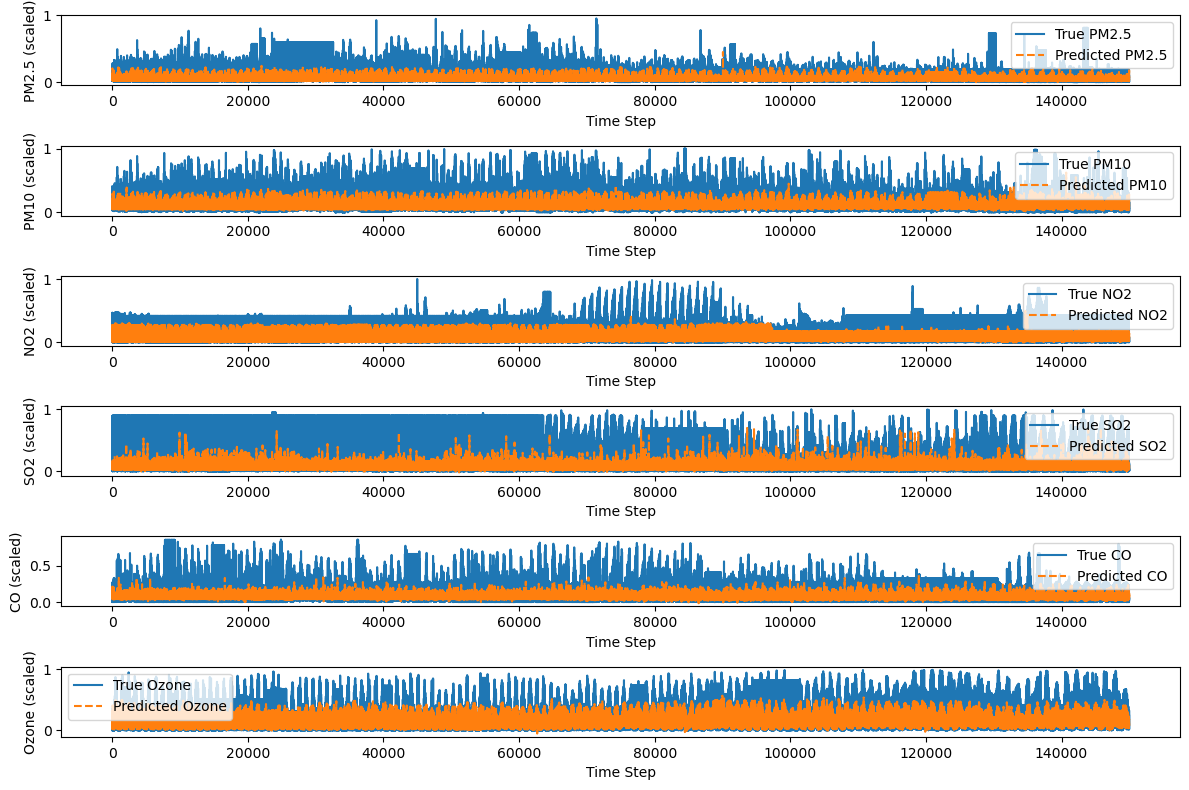

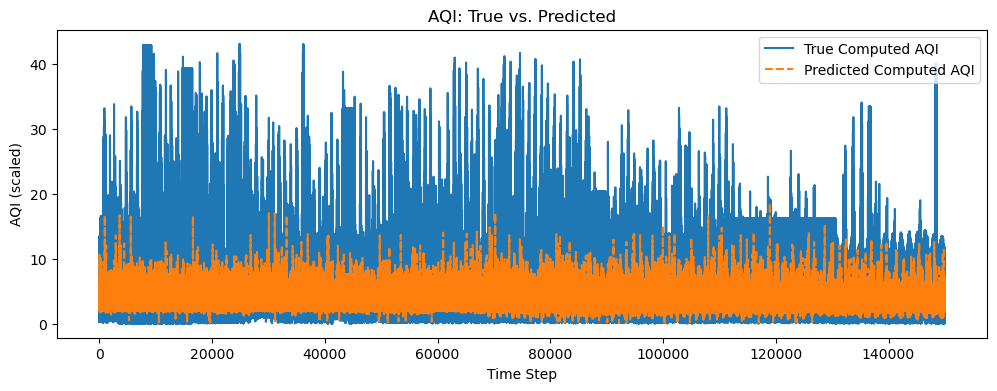

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ------------------------------------------------------------------------------
# Helper Functions
# ------------------------------------------------------------------------------
def compute_aqi(predicted_pollutants):
    """
    Compute AQI from pollutant concentrations using standard breakpoint values.
    The breakpoints and index ranges here are simplified examples.
    """
    aqi_values = {
        "PM2.5": [(30, 60, 90, 120, 250), (50, 100, 200, 300, 400)],
        "PM10": [(50, 100, 250, 350, 430), (50, 100, 200, 300, 400)],
        "NO2": [(40, 80, 180, 280, 400), (50, 100, 200, 300, 400)],
        "SO2": [(40, 80, 380, 800, 1600), (50, 100, 200, 300, 400)],
        "CO": [(1, 2, 10, 17, 34), (50, 100, 200, 300, 400)],
        "Ozone": [(50, 100, 160, 200, 300), (50, 100, 200, 300, 400)]
    }
    sub_aqis = []
    for pollutant, (breakpoints, indexes) in aqi_values.items():
        if pollutant in predicted_pollutants:
            conc = predicted_pollutants[pollutant]
            for i, bp in enumerate(breakpoints):
                if conc <= bp:
                    sub_aqi = indexes[i] * (conc / bp)
                    sub_aqis.append(sub_aqi)
                    break
    return max(sub_aqis) if sub_aqis else np.nan

def calculate_metrics(y_true, y_pred, feature_names):
    """Calculate RMSE and MAE for each feature (pollutant)"""
    metrics = {}
    for i, name in enumerate(feature_names):
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mse)
        metrics[name] = {'RMSE': rmse, 'MAE': mae}
    return metrics

# ------------------------------------------------------------------------------
# Reload and preprocess the original CSV to obtain ground truth (y_test)
logging.info("Reloading and preprocessing the original CSV...")
df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])
df = df.sort_values(by="From Date")

pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
meteo_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
all_features = pollutants + meteo_features

# Fill missing values and convert to lower precision to match earlier processing.
df[all_features] = df[all_features].interpolate(method="linear")
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# We use meteorological features as inputs and pollutants as targets but here we only need y_test.
_, y_test = train_test_split(df[pollutants].values, test_size=0.2, shuffle=False)

# ------------------------------------------------------------------------------
# Load saved predictions (XGBoost pollutant predictions and computed AQI)
logging.info("Loading saved predictions from 'multi_pollutant_aqi_predictions.csv'...")
pred_df = pd.read_csv("multi_pollutant_aqi_predictions.csv")
# Build the predictions array (assumes columns "XGBoost_PM2.5", "XGBoost_PM10", ..., "Computed_AQI" exist)
xgb_predictions = np.column_stack([pred_df[f"XGBoost_{p}"] for p in pollutants])
aqi_predictions = pred_df["Computed_AQI"].values

# ------------------------------------------------------------------------------
# Compute performance metrics for pollutants and AQI.
# ------------------------------------------------------------------------------
metrics_pollutants = calculate_metrics(y_test, xgb_predictions, pollutants)
logging.info("XGBoost Pollutant Metrics:")
for pollutant, m in metrics_pollutants.items():
    logging.info(f"{pollutant}: RMSE = {m['RMSE']:.3f}, MAE = {m['MAE']:.3f}")

# Compute ground-truth AQI for the test set (from the true pollutant values)
aqi_true = []
for i in range(len(y_test)):
    actual_pollutants = {pollutant: y_test[i, j] for j, pollutant in enumerate(pollutants)}
    aqi_true.append(compute_aqi(actual_pollutants))

mse_aqi = mean_squared_error(aqi_true, aqi_predictions)
mae_aqi = mean_absolute_error(aqi_true, aqi_predictions)
rmse_aqi = np.sqrt(mse_aqi)
logging.info(f"Computed AQI Metrics: RMSE = {rmse_aqi:.3f}, MAE = {mae_aqi:.3f}")

# ------------------------------------------------------------------------------
# Visualization Section
# ------------------------------------------------------------------------------
# 1. Plot of actual vs. predicted pollutant values.
plt.figure(figsize=(12, 8))
num_steps = len(xgb_predictions)
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(range(num_steps), y_test[:, i], label=f"True {pollutant}")
    plt.plot(range(num_steps), xgb_predictions[:, i], label=f"Predicted {pollutant}", linestyle="--")
    plt.xlabel("Time Step")
    plt.ylabel(f"{pollutant} (scaled)")
    plt.legend()
plt.tight_layout()
plt.show()

# 2. Plot of actual vs. predicted (computed) AQI.
plt.figure(figsize=(12, 4))
plt.plot(range(len(aqi_true)), aqi_true, label="True Computed AQI")
plt.plot(range(len(aqi_predictions)), aqi_predictions, label="Predicted Computed AQI", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("AQI (scaled)")
plt.title("AQI: True vs. Predicted")
plt.legend()
plt.show()


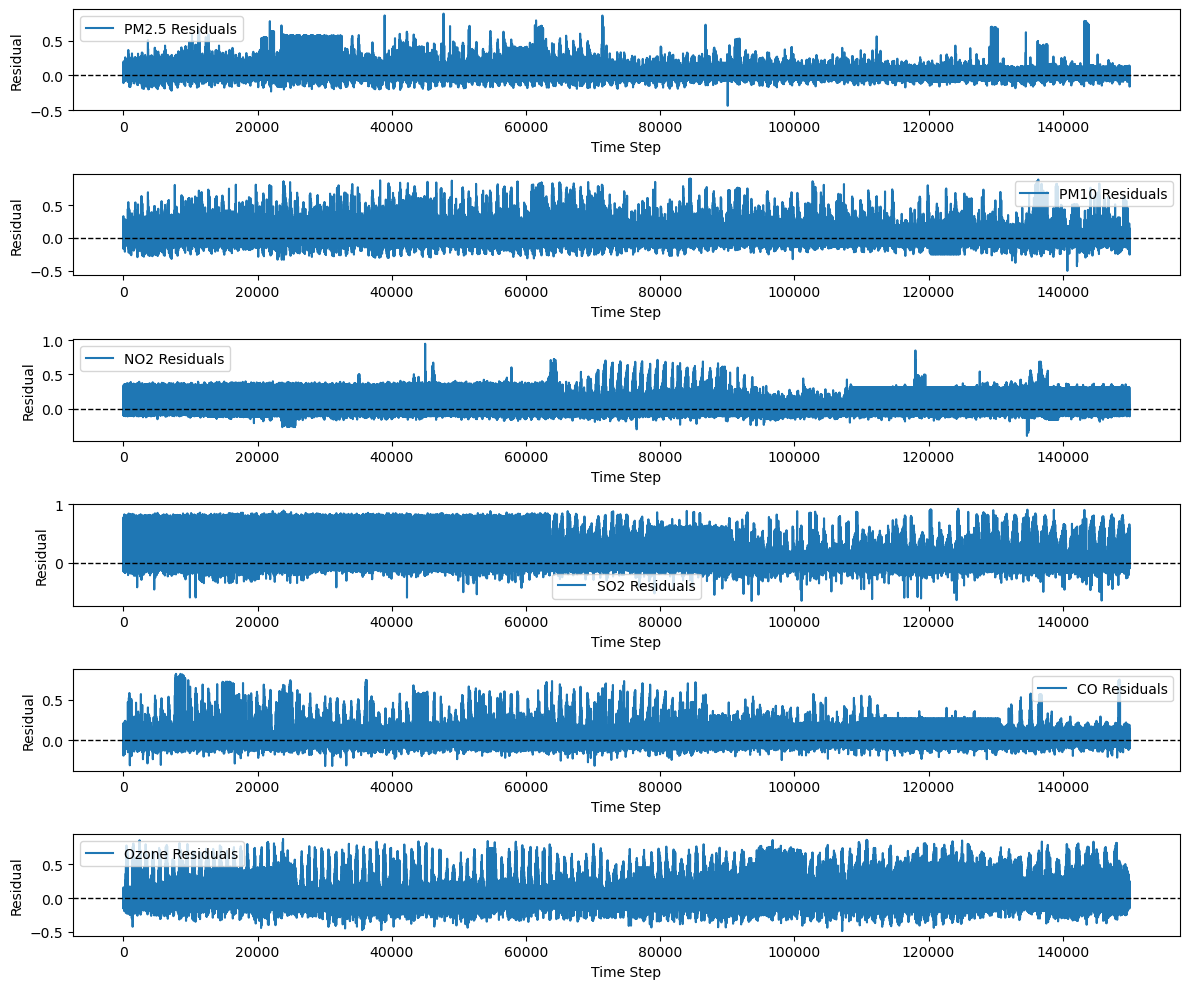

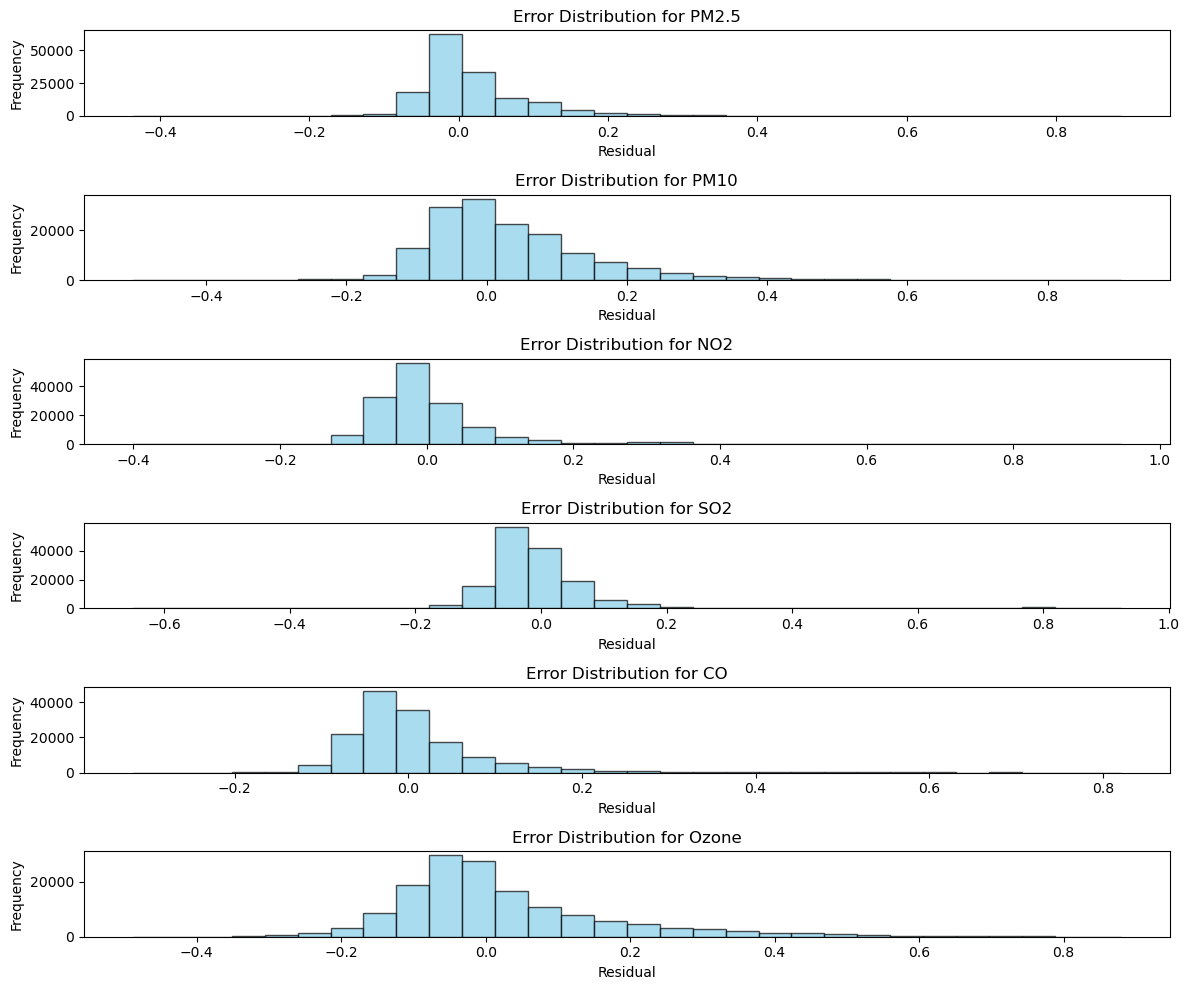

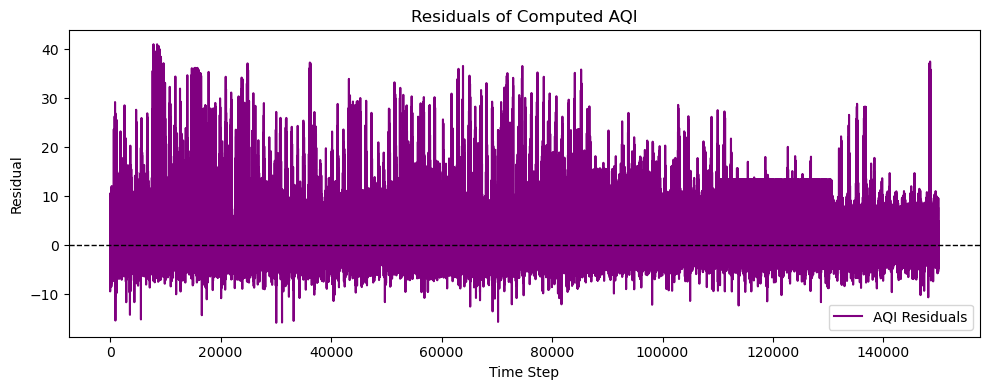

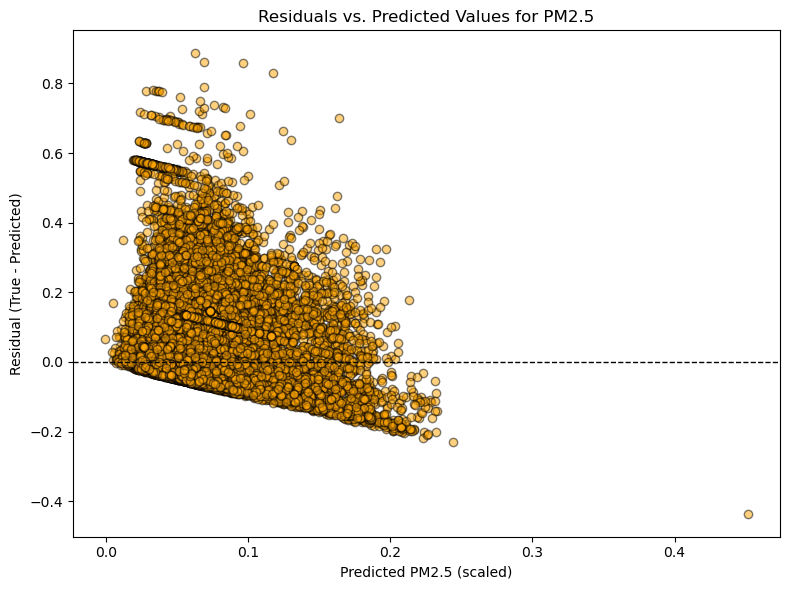

2025-04-21 19:55:05,980 - INFO - PM2.5: RMSE = 0.078, MAE = 0.049
2025-04-21 19:55:05,992 - INFO - PM10: RMSE = 0.124, MAE = 0.086
2025-04-21 19:55:06,007 - INFO - NO2: RMSE = 0.079, MAE = 0.052
2025-04-21 19:55:06,022 - INFO - SO2: RMSE = 0.120, MAE = 0.065
2025-04-21 19:55:06,034 - INFO - CO: RMSE = 0.081, MAE = 0.053
2025-04-21 19:55:06,046 - INFO - Ozone: RMSE = 0.152, MAE = 0.106
2025-04-21 19:55:06,090 - INFO - Computed AQI: RMSE = 4.053, MAE = 2.656


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Optional: Set up logging for output clarity.
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --------------------------
# 1. Residuals for Each Pollutant
# --------------------------
# Calculate residuals (error) between true and predicted values.
# y_test and xgb_predictions should be numpy arrays of shape (num_samples, num_pollutants)
residuals = y_test - xgb_predictions  # Element-wise difference

# Plot residual time series for each pollutant.
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
plt.figure(figsize=(12, 10))
num_samples = residuals.shape[0]
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(range(num_samples), residuals[:, i], label=f"{pollutant} Residuals")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Time Step")
    plt.ylabel("Residual")
    plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 2. Error Distribution Histograms for Each Pollutant
# --------------------------
plt.figure(figsize=(12, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.hist(residuals[:, i], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution for {pollutant}")
plt.tight_layout()
plt.show()

# --------------------------
# 3. Residual Analysis for Computed AQI
# --------------------------
# Let’s assume aqi_true and aqi_predictions are available as one-dimensional numpy arrays.
residuals_aqi = np.array(aqi_true) - np.array(aqi_predictions)

plt.figure(figsize=(10, 4))
plt.plot(residuals_aqi, label="AQI Residuals", color="purple")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.title("Residuals of Computed AQI")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 4. Scatter Plot: Residuals vs. Predicted Values (Example for PM2.5)
# --------------------------
plt.figure(figsize=(8, 6))
plt.scatter(xgb_predictions[:, 0], residuals[:, 0], alpha=0.5, color='orange', edgecolor='k')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs. Predicted Values for PM2.5")
plt.tight_layout()
plt.show()

# --------------------------
# 5. Optional: Print Statistical Summary for Residuals
# --------------------------
for i, pollutant in enumerate(pollutants):
    rmse = np.sqrt(mean_squared_error(y_test[:, i], xgb_predictions[:, i]))
    mae = mean_absolute_error(y_test[:, i], xgb_predictions[:, i])
    logging.info(f"{pollutant}: RMSE = {rmse:.3f}, MAE = {mae:.3f}")

aqi_rmse = np.sqrt(mean_squared_error(aqi_true, aqi_predictions))
aqi_mae = mean_absolute_error(aqi_true, aqi_predictions)
logging.info(f"Computed AQI: RMSE = {aqi_rmse:.3f}, MAE = {aqi_mae:.3f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:59:24   Log-Likelihood:             1.7631e+05
No. Observations:              149975   AIC:                        -3.526e+05
Df Residuals:                  149973   BIC:                        -3.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.001     81.711      0.0

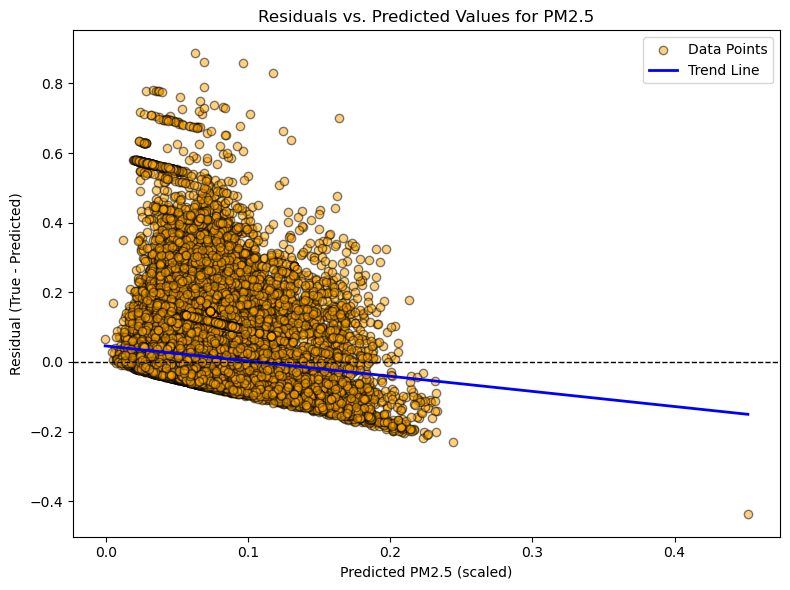

In [18]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- Assumption: y_test and xgb_predictions are defined ---
# y_test: ground-truth pollutant values, shape (num_samples, 6)
# xgb_predictions: predicted pollutant values from XGBoost, shape (num_samples, 6)
# The pollutant order is: ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]

# Compute the residuals for all pollutants:
residuals = y_test - xgb_predictions

# Extract PM2.5 residuals and predicted values
PM25_predicted = xgb_predictions[:, 0]     # PM2.5 predicted values
PM25_residuals  = residuals[:, 0]           # PM2.5 residuals

# --- Fit a linear regression on the residuals vs. predicted values ---
# (This will help quantify whether the model systematically underpredicts when PM2.5 is high.)

# Add constant term for intercept
X_with_const = sm.add_constant(PM25_predicted)
model = sm.OLS(PM25_residuals, X_with_const).fit()

# Print the summary to inspect the coefficient and p-value for the slope.
print(model.summary())

# --- Visualization: Scatter plot with trend line ---
# Create a line of predicted trend values for visualization
x_line = np.linspace(PM25_predicted.min(), PM25_predicted.max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = model.predict(x_line_const)

plt.figure(figsize=(8, 6))
plt.scatter(PM25_predicted, PM25_residuals, alpha=0.5, color='orange', edgecolor='k', label='Data Points')
plt.plot(x_line, y_line, color='blue', linewidth=2, label='Trend Line')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs. Predicted Values for PM2.5")
plt.legend()
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:03:07   Log-Likelihood:             1.7631e+05
No. Observations:              149975   AIC:                        -3.526e+05
Df Residuals:                  149973   BIC:                        -3.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.001     81.711      0.0

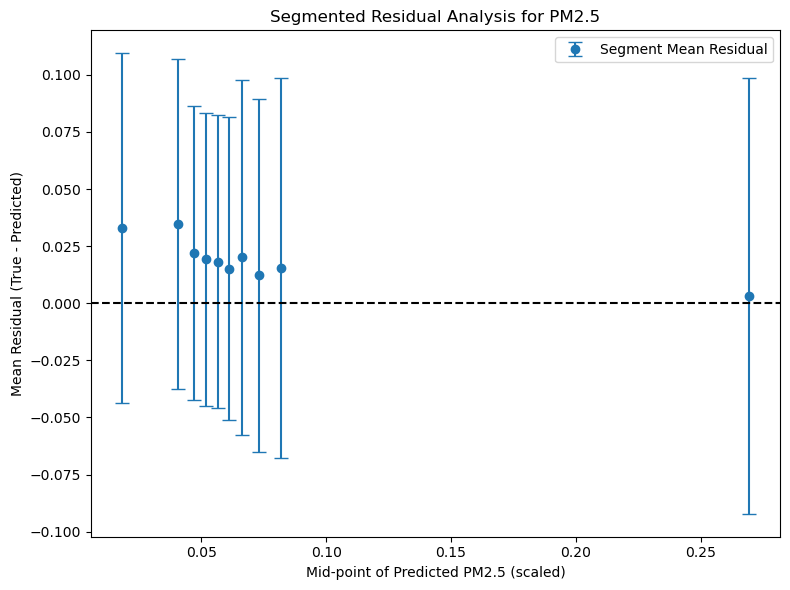

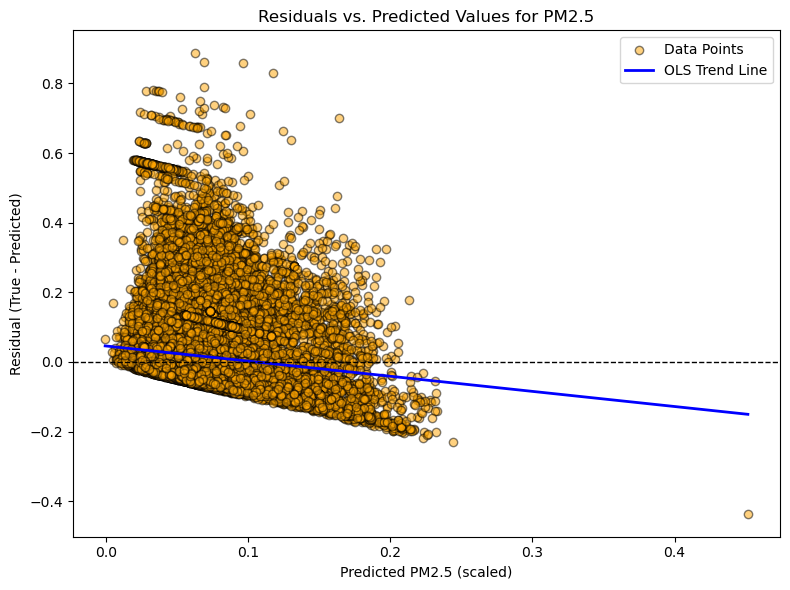

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Assume y_test and xgb_predictions exist ---
# y_test: ground truth pollutant values, shape (num_samples, 6)
# xgb_predictions: predicted values (num_samples, 6) with column 0 == PM2.5

# Compute residuals for PM2.5:
residuals = y_test - xgb_predictions
PM25_pred = xgb_predictions[:, 0]
PM25_resid = residuals[:, 0]

# --- OLS Regression on Residuals vs. Predicted PM2.5 ---
X_const = sm.add_constant(PM25_pred)
ols_model = sm.OLS(PM25_resid, X_const).fit()
print(ols_model.summary())

# --- Segment Analysis: Divide predicted PM2.5 into quantiles ---
num_quantiles = 10
quantile_bins = np.quantile(PM25_pred, np.linspace(0, 1, num_quantiles + 1))
bin_indices = np.digitize(PM25_pred, quantile_bins)

quantile_means = []
quantile_stds = []
for q in range(1, num_quantiles + 1):
    indices = np.where(bin_indices == q)[0]
    quantile_means.append(PM25_resid[indices].mean())
    quantile_stds.append(PM25_resid[indices].std())

# Create a DataFrame for visualization:
df_quantiles = pd.DataFrame({
    'Quantile': np.arange(1, num_quantiles+1),
    'Mean_Residual': quantile_means,
    'Std_Residual': quantile_stds,
    'Mid_Predicted': [
        (quantile_bins[q-1] + quantile_bins[q]) / 2 for q in range(1, num_quantiles+1)
    ]
})
print(df_quantiles)

# Plot segmented mean residuals vs. mid-point of predicted values in each quantile.
plt.figure(figsize=(8, 6))
plt.errorbar(df_quantiles['Mid_Predicted'], df_quantiles['Mean_Residual'],
             yerr=df_quantiles['Std_Residual'], fmt='o', capsize=5, label='Segment Mean Residual')
plt.xlabel('Mid-point of Predicted PM2.5 (scaled)')
plt.ylabel('Mean Residual (True - Predicted)')
plt.title('Segmented Residual Analysis for PM2.5')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Plot the original scatter with OLS trend line again ---
x_line = np.linspace(PM25_pred.min(), PM25_pred.max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = ols_model.predict(x_line_const)

plt.figure(figsize=(8, 6))
plt.scatter(PM25_pred, PM25_resid, alpha=0.5, color='orange', edgecolor='k', label='Data Points')
plt.plot(x_line, y_line, color='blue', linewidth=2, label='OLS Trend Line')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs. Predicted Values for PM2.5")
plt.legend()
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:06:30   Log-Likelihood:             1.7631e+05
No. Observations:              149975   AIC:                        -3.526e+05
Df Residuals:                  149973   BIC:                        -3.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.001     81.711      0.0

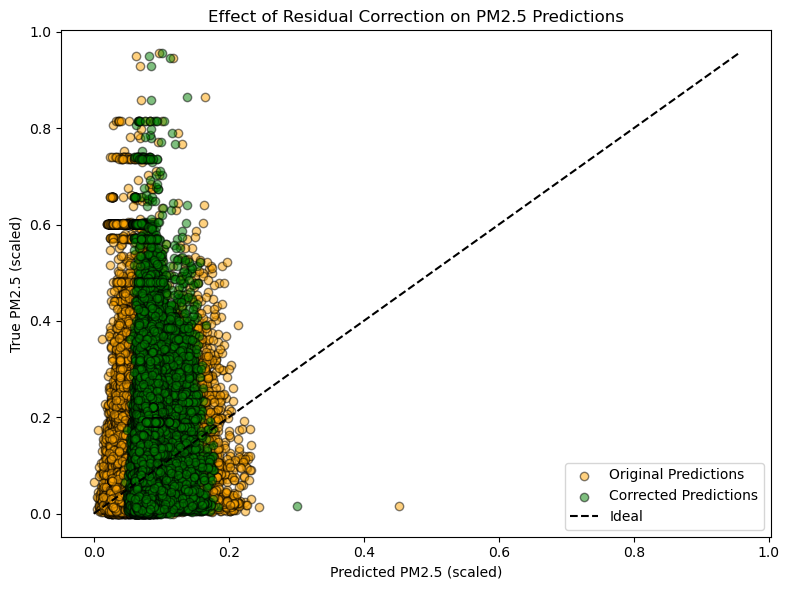

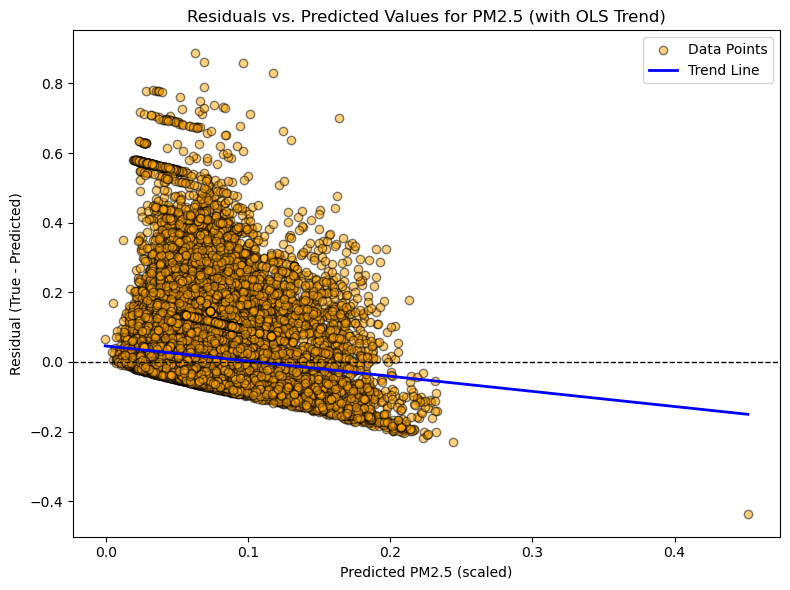

In [22]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------------
# Step 1: Recompute the residuals (if needed)
# Assuming your order of pollutants is: ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
residuals = y_test - xgb_predictions

# Extract predicted PM2.5 and residuals for PM2.5
PM25_predicted = xgb_predictions[:, 0]
PM25_residuals = residuals[:, 0]

# (Optional) Re-fitting the OLS model on PM2.5 residuals vs. predicted PM2.5,
# if not already done:
X_const = sm.add_constant(PM25_predicted)
ols_model = sm.OLS(PM25_residuals, X_const).fit()
print(ols_model.summary())

# -------------------------------
# Step 2: Segment Analysis (this was already computed, but here is a reminder of the output)
# The printed quantile table (shown in your log) indicates that at lower predicted PM2.5 levels,
# the average residual is around 0.03, while at higher predicted values, it drops toward zero.
#
# (The OLS model shows a significant negative slope: -0.4350, which indicates that with increasing
# predicted PM2.5, the model overpredicts relative to the actual value.)
#
# -------------------------------
# Step 3: Apply a Residual Correction
# The idea is to "correct" the raw PM2.5 predictions using the OLS-estimated bias.
# For each predicted PM2.5 value, shoot a correction term computed using the fitted OLS model.

# Compute correction: the OLS model predicts the expected residual for each prediction.
correction = ols_model.predict(sm.add_constant(PM25_predicted))
# New (corrected) prediction: add the predicted residual (correction) to the original prediction.
PM25_predicted_corrected = PM25_predicted + correction

# -------------------------------
# Step 4: Compute Performance Metrics Before and After Correction

# True PM2.5 values:
PM25_true = y_test[:, 0]

# Original error metrics
mae_original = mean_absolute_error(PM25_true, PM25_predicted)
rmse_original = np.sqrt(mean_squared_error(PM25_true, PM25_predicted))

# Corrected error metrics
mae_corrected = mean_absolute_error(PM25_true, PM25_predicted_corrected)
rmse_corrected = np.sqrt(mean_squared_error(PM25_true, PM25_predicted_corrected))

print("Original PM2.5 Prediction: MAE = {:.3f}, RMSE = {:.3f}".format(mae_original, rmse_original))
print("Corrected PM2.5 Prediction: MAE = {:.3f}, RMSE = {:.3f}".format(mae_corrected, rmse_corrected))

# -------------------------------
# Step 5: Visualization of the Correction Effect

# Scatter plot of true PM2.5 vs. predicted values (both raw and corrected)
plt.figure(figsize=(8, 6))
plt.scatter(PM25_predicted, PM25_true, alpha=0.5, label='Original Predictions', color='orange', edgecolor='k')
plt.scatter(PM25_predicted_corrected, PM25_true, alpha=0.5, label='Corrected Predictions', color='green', edgecolor='k')
# Add identity line for reference:
min_val = min(PM25_predicted.min(), PM25_predicted_corrected.min(), PM25_true.min())
max_val = max(PM25_predicted.max(), PM25_predicted_corrected.max(), PM25_true.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal')
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("True PM2.5 (scaled)")
plt.title("Effect of Residual Correction on PM2.5 Predictions")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# (Optional) Additional Plot: Residual Correction Trend
# Plot the scatter with the OLS trend line if you wish to re-inspect the residual pattern
x_line = np.linspace(PM25_predicted.min(), PM25_predicted.max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = ols_model.predict(x_line_const)

plt.figure(figsize=(8, 6))
plt.scatter(PM25_predicted, PM25_residuals, alpha=0.5, color='orange', edgecolor='k', label='Data Points')
plt.plot(x_line, y_line, color='blue', linewidth=2, label='Trend Line')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs. Predicted Values for PM2.5 (with OLS Trend)")
plt.legend()
plt.tight_layout()
plt.show()


2025-04-21 20:15:27,434 - INFO - Loading dataset from 'merged_data_imputed_revised.csv'...
2025-04-21 20:15:32,267 - INFO - Missing values before interpolation:
PM2.5             0
PM10              0
NO2               0
SO2           20842
CO             1257
Ozone             0
RH            40606
WS (m/s)      20842
Temp         472320
BP (mmHg)    191351
dtype: int64
2025-04-21 20:15:33,246 - INFO - Data preprocessing completed.
2025-04-21 20:15:33,932 - INFO - Training Multi-Output XGBoost model...
C:\Users\kisho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 409s 11ms/step - loss: 0.0088 - val_loss: 0.0120
Epoch 2/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 404s 11ms/step - loss: 0.0084 - val_loss: 0.0119
Epoch 3/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 422s 11ms/step - loss: 0.0084 - val_loss: 0.0119
Epoch 4/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 408s 11ms/step - loss: 0.0084 - val_loss: 0.0118
Epoch 5/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 405s 11ms/step - loss: 0.0083 - val_loss: 0.0119
Epoch 6/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 408s 11ms/step - loss: 0.0083 - val_loss: 0.0118
Epoch 7/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 404s 11ms/step - loss: 0.0083 - val_loss: 0.0119
Epoch 8/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 405s 11ms/step - loss: 0.0083 - val_loss: 0.0119
Epoch 9/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 409s 11ms/step - loss: 0.0083 - val_loss: 0.0118
Epoch 10/10
37494/37494 ━━━━━━━━━━━━━━━━━━━━ 408s 11ms/step - loss: 0.0083 - val_loss: 0.0119


2025-04-21 21:23:53,357 - INFO - LSTM model training completed.
2025-04-21 21:24:04,563 - INFO - Saving models and predictions...
2025-04-21 21:24:06,657 - INFO - Models and forecasts saved successfully.
2025-04-21 21:24:06,711 - INFO - XGBoost Pollutant Metrics:
2025-04-21 21:24:06,713 - INFO - PM2.5: RMSE = 0.078, MAE = 0.049
2025-04-21 21:24:06,715 - INFO - PM10: RMSE = 0.124, MAE = 0.086
2025-04-21 21:24:06,718 - INFO - NO2: RMSE = 0.079, MAE = 0.052
2025-04-21 21:24:06,720 - INFO - SO2: RMSE = 0.120, MAE = 0.065
2025-04-21 21:24:06,723 - INFO - CO: RMSE = 0.081, MAE = 0.053
2025-04-21 21:24:06,725 - INFO - Ozone: RMSE = 0.152, MAE = 0.106
2025-04-21 21:24:20,278 - INFO - Computed AQI Metrics: RMSE = 4.053, MAE = 2.656
2025-04-21 21:24:20,422 - INFO - Original PM2.5 Prediction: MAE = 0.049, RMSE = 0.078
2025-04-21 21:24:20,424 - INFO - Corrected PM2.5 Prediction: MAE = 0.052, RMSE = 0.075


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:24:20   Log-Likelihood:             1.7631e+05
No. Observations:              149975   AIC:                        -3.526e+05
Df Residuals:                  149973   BIC:                        -3.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.001     81.711      0.0

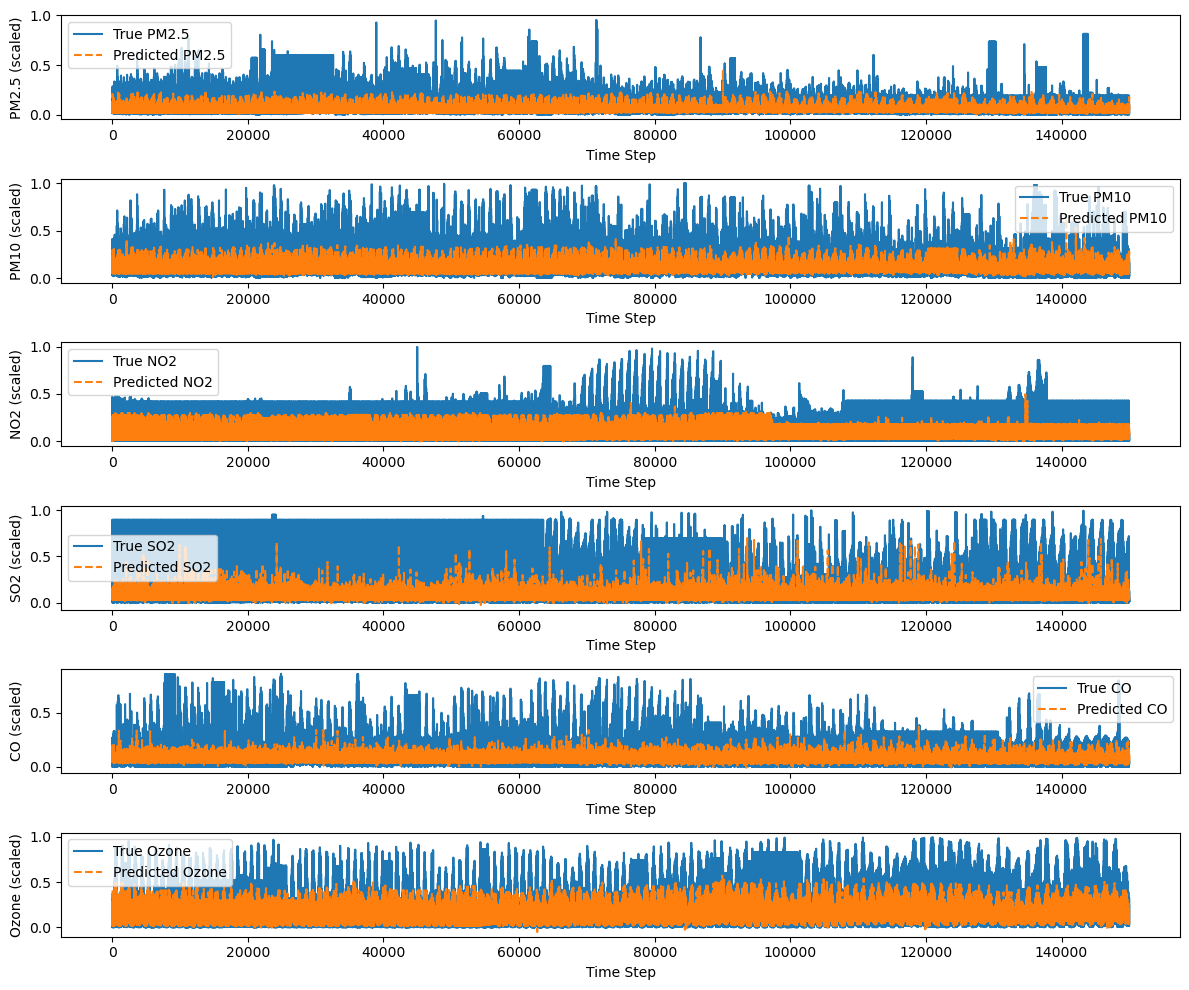

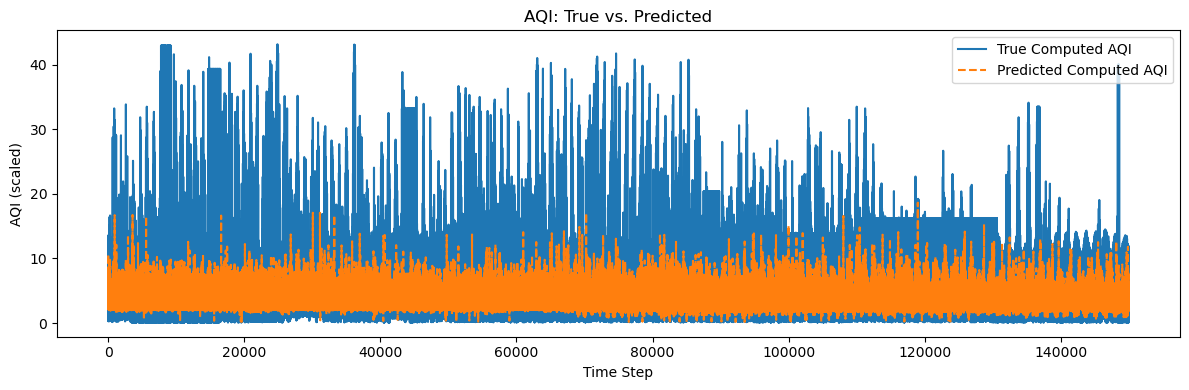

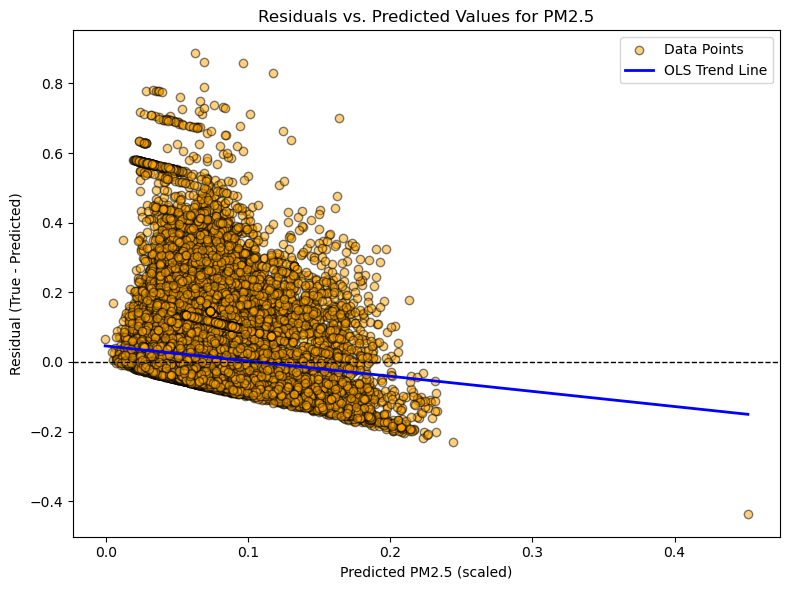

   Quantile  Mean_Residual  Std_Residual  Mid_Predicted
0         1       0.032795      0.076640       0.018236
1         2       0.034721      0.072414       0.040602
2         3       0.022085      0.064274       0.046963
3         4       0.019199      0.064268       0.051991
4         5       0.018240      0.064269       0.056577
5         6       0.015147      0.066406       0.061170
6         7       0.020068      0.077649       0.066441
7         8       0.012239      0.077210       0.073110
8         9       0.015473      0.083119       0.081939
9        10       0.003316      0.095479       0.269219


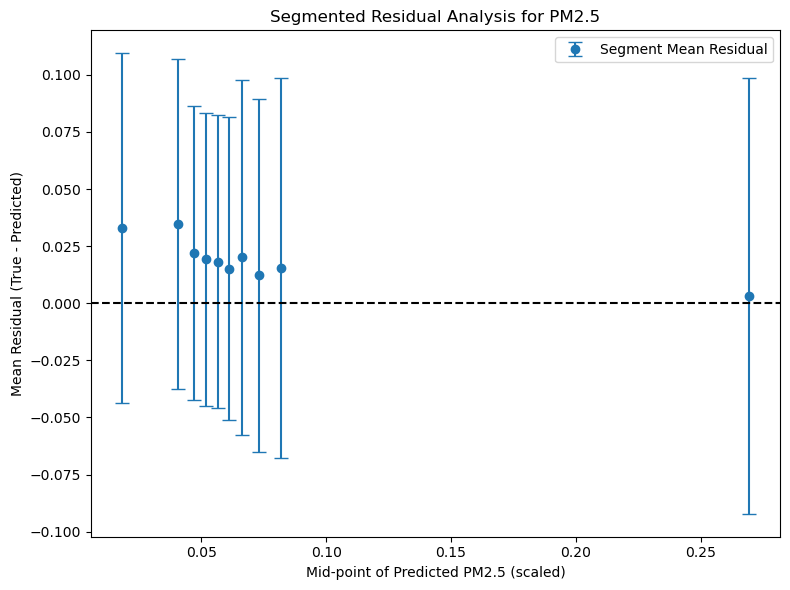

2025-04-21 21:24:38,844 - INFO - Final integrated air quality forecasting pipeline complete!


In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
import pickle
import gc
import logging
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor

# -------------------------------
# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# -------------------------------
# 1. Data Ingestion & Preprocessing
# -------------------------------
logging.info("Loading dataset from 'merged_data_imputed_revised.csv'...")
df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])
df = df.sort_values(by="From Date")  # Ensure chronological order

# Define pollutant and meteorological features
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
meteorological_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
all_features = pollutants + meteorological_features

# Check and interpolate missing values
missing_values = df[all_features].isnull().sum()
logging.info(f"Missing values before interpolation:\n{missing_values}")
df[all_features] = df[all_features].interpolate(method="linear")

# Convert numeric columns to float32 to reduce memory usage
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

# Scale features with MinMaxScaler
scaler = MinMaxScaler()
df[all_features] = scaler.fit_transform(df[all_features])
logging.info("Data preprocessing completed.")

# -------------------------------
# 2. Creating Training and Testing Sets
# -------------------------------
# For XGBoost: use meteorological features as inputs (X) and pollutant values as outputs (y)
X = df[meteorological_features].values       # Shape: (num_samples, 4)
y = df[pollutants].values                    # Shape: (num_samples, 6)

# Split data (time-series; do not shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
gc.collect()  # Clean up memory

# -------------------------------
# 3. Train Multi-Output XGBoost Model
# -------------------------------
logging.info("Training Multi-Output XGBoost model...")
xgb_regressor = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    objective="reg:squarederror",
    tree_method='hist',    # optimized memory usage
    gpu_id=0 if tf.config.list_physical_devices('GPU') else -1
)
xgb_model = MultiOutputRegressor(xgb_regressor)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
gc.collect()  # Clean memory

# -------------------------------
# 4. Prepare LSTM Data and Train LSTM Model
# -------------------------------
def create_sequences(input_data, target_data, seq_length):
    """
    Create sequences for LSTM training:
    - input_data: meteorological features
    - target_data: pollutant values (all 6)
    """
    sequences, labels = [], []
    for i in range(len(input_data) - seq_length):
        sequences.append(input_data[i:i + seq_length])
        labels.append(target_data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10  # Using past 10 timesteps
X_lstm, y_lstm = create_sequences(df[meteorological_features].values, df[pollutants].values, seq_length)

# Split LSTM data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# Build a lightweight LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, input_shape=(seq_length, len(meteorological_features))),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(16, activation='relu'),
    tf.keras.layers.Dense(len(pollutants))  # Output: 6 pollutants
])
lstm_model.compile(optimizer='adam', loss='mse')

# Adjust batch size based on data size
batch_size = 8 if X_train_lstm.nbytes > 2e9 else 16
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=batch_size, validation_data=(X_test_lstm, y_test_lstm))
logging.info("LSTM model training completed.")

# -------------------------------
# 5. Compute AQI Dynamically
# -------------------------------
def compute_aqi(predicted_pollutants):
    """
    Compute AQI from pollutant concentrations via simple breakpoint scaling.
    The points here are illustrative; adjust breakpoints per local guidelines.
    """
    aqi_values = {
        "PM2.5": [(30, 60, 90, 120, 250), (50, 100, 200, 300, 400)],
        "PM10": [(50, 100, 250, 350, 430), (50, 100, 200, 300, 400)],
        "NO2": [(40, 80, 180, 280, 400), (50, 100, 200, 300, 400)],
        "SO2": [(40, 80, 380, 800, 1600), (50, 100, 200, 300, 400)],
        "CO": [(1, 2, 10, 17, 34), (50, 100, 200, 300, 400)],
        "Ozone": [(50, 100, 160, 200, 300), (50, 100, 200, 300, 400)]
    }
    sub_aqis = []
    for pollutant, (breakpoints, indices) in aqi_values.items():
        if pollutant in predicted_pollutants:
            conc = predicted_pollutants[pollutant]
            for i, bp in enumerate(breakpoints):
                if conc <= bp:
                    sub_aqi = indices[i] * (conc/bp)
                    sub_aqis.append(sub_aqi)
                    break
    return max(sub_aqis) if sub_aqis else np.nan

# Compute AQI for test set predictions from XGBoost (for each sample)
predicted_pollutants = {pollutant: xgb_predictions[:, i] for i, pollutant in enumerate(pollutants)}
aqi_predictions = [compute_aqi({pollutant: values[i] for pollutant, values in predicted_pollutants.items()})
                   for i in range(len(X_test))]

# -------------------------------
# 6. Save Models and Predictions
# -------------------------------
logging.info("Saving models and predictions...")
with open("xgb_multi_pollutants_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
with open("lstm_multi_pollutants_model.pkl", "wb") as f:
    pickle.dump(lstm_model.to_json(), f)
# Save predictions including computed AQI
predictions_df = pd.DataFrame({f"XGBoost_{pollutant}": xgb_predictions[:, i] for i, pollutant in enumerate(pollutants)})
predictions_df["Computed_AQI"] = aqi_predictions
predictions_df.to_csv("multi_pollutant_aqi_predictions.csv", index=False)
logging.info("Models and forecasts saved successfully.")

# -------------------------------
# 7. Evaluate Performance: Error Metrics & Residual Analysis
# -------------------------------
def calculate_metrics(y_true, y_pred, feature_names):
    metrics = {}
    for i, name in enumerate(feature_names):
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mse)
        metrics[name] = {'RMSE': rmse, 'MAE': mae}
    return metrics

metrics_pollutants = calculate_metrics(y_test, xgb_predictions, pollutants)
logging.info("XGBoost Pollutant Metrics:")
for pollutant, m in metrics_pollutants.items():
    logging.info(f"{pollutant}: RMSE = {m['RMSE']:.3f}, MAE = {m['MAE']:.3f}")

# Compute ground truth AQI from y_test:
aqi_true = []
for i in range(len(y_test)):
    actual_pollutants = {pollutant: y_test[i, j] for j, pollutant in enumerate(pollutants)}
    aqi_true.append(compute_aqi(actual_pollutants))

aqi_rmse = np.sqrt(mean_squared_error(aqi_true, aqi_predictions))
aqi_mae = mean_absolute_error(aqi_true, aqi_predictions)
logging.info(f"Computed AQI Metrics: RMSE = {aqi_rmse:.3f}, MAE = {aqi_mae:.3f}")

# -------------------------------
# 8. Residual Analysis and Correction for PM2.5
# -------------------------------
# For PM2.5, compute residuals: residual = true - predicted.
residuals = y_test - xgb_predictions
PM25_predicted = xgb_predictions[:, 0]
PM25_resid = residuals[:, 0]

# Fit OLS regression on PM2.5 residuals vs. predicted values.
X_const = sm.add_constant(PM25_predicted)
ols_model = sm.OLS(PM25_resid, X_const).fit()
print(ols_model.summary())

# Apply residual correction: new_prediction = original_prediction + predicted_residual
correction = ols_model.predict(sm.add_constant(PM25_predicted))
PM25_predicted_corrected = PM25_predicted + correction

# Compute error metrics for PM2.5 before and after correction.
PM25_true = y_test[:, 0]
mae_original = mean_absolute_error(PM25_true, PM25_predicted)
rmse_original = np.sqrt(mean_squared_error(PM25_true, PM25_predicted))
mae_corrected = mean_absolute_error(PM25_true, PM25_predicted_corrected)
rmse_corrected = np.sqrt(mean_squared_error(PM25_true, PM25_predicted_corrected))

logging.info("Original PM2.5 Prediction: MAE = {:.3f}, RMSE = {:.3f}".format(mae_original, rmse_original))
logging.info("Corrected PM2.5 Prediction: MAE = {:.3f}, RMSE = {:.3f}".format(mae_corrected, rmse_corrected))

# -------------------------------
# 9. Visualizations
# -------------------------------

# (a) Plot Actual vs. Predicted Pollutants (for XGBoost)
plt.figure(figsize=(12, 10))
num_steps = len(xgb_predictions)
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(range(num_steps), y_test[:, i], label=f"True {pollutant}")
    plt.plot(range(num_steps), xgb_predictions[:, i], label=f"Predicted {pollutant}", linestyle="--")
    plt.xlabel("Time Step")
    plt.ylabel(f"{pollutant} (scaled)")
    plt.legend()
plt.tight_layout()
plt.show()

# (b) Plot True vs. Predicted Computed AQI
plt.figure(figsize=(12, 4))
plt.plot(range(len(aqi_true)), aqi_true, label="True Computed AQI")
plt.plot(range(len(aqi_predictions)), aqi_predictions, label="Predicted Computed AQI", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("AQI (scaled)")
plt.title("AQI: True vs. Predicted")
plt.legend()
plt.tight_layout()
plt.show()

# (c) Scatter Plot: Residuals vs. Predicted PM2.5 with OLS Trend Line
x_line = np.linspace(PM25_predicted.min(), PM25_predicted.max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = ols_model.predict(x_line_const)
plt.figure(figsize=(8, 6))
plt.scatter(PM25_predicted, PM25_resid, alpha=0.5, color='orange', edgecolor='k', label='Data Points')
plt.plot(x_line, y_line, color='blue', linewidth=2, label='OLS Trend Line')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted PM2.5 (scaled)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals vs. Predicted Values for PM2.5")
plt.legend()
plt.tight_layout()
plt.show()

# (d) Segmented Residual Analysis for PM2.5
num_quantiles = 10
quantile_bins = np.quantile(PM25_predicted, np.linspace(0, 1, num_quantiles + 1))
bin_indices = np.digitize(PM25_predicted, quantile_bins)
quantile_means, quantile_stds = [], []
for q in range(1, num_quantiles + 1):
    indices = np.where(bin_indices == q)[0]
    quantile_means.append(PM25_resid[indices].mean())
    quantile_stds.append(PM25_resid[indices].std())
df_quantiles = pd.DataFrame({
    'Quantile': np.arange(1, num_quantiles+1),
    'Mean_Residual': quantile_means,
    'Std_Residual': quantile_stds,
    'Mid_Predicted': [(quantile_bins[q-1] + quantile_bins[q]) / 2 for q in range(1, num_quantiles+1)]
})
print(df_quantiles)
plt.figure(figsize=(8, 6))
plt.errorbar(df_quantiles['Mid_Predicted'], df_quantiles['Mean_Residual'],
             yerr=df_quantiles['Std_Residual'], fmt='o', capsize=5, label="Segment Mean Residual")
plt.xlabel('Mid-point of Predicted PM2.5 (scaled)')
plt.ylabel('Mean Residual (True - Predicted)')
plt.title('Segmented Residual Analysis for PM2.5')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# End of Pipeline
# -------------------------------
logging.info("Final integrated air quality forecasting pipeline complete!")


In [26]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])
df = df.sort_values(by="From Date")  # Ensure chronological order

# Define your features (e.g., pollutants and meteorological features)
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
meteorological_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
all_features = pollutants + meteorological_features

# Interpolate missing values
df[all_features] = df[all_features].interpolate(method="linear")

# (Optional) Convert numeric columns to float32 for memory optimization
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

# Fit MinMaxScaler to your data
scaler = MinMaxScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Save the fitted scaler to a pickle file for later use
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler has been saved to scaler.pkl!")


Scaler has been saved to scaler.pkl!


In [28]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("merged_data_imputed_revised.csv", parse_dates=["From Date"])
df = df.sort_values(by="From Date")

# Define features
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
meteorological_features = ["RH", "WS (m/s)", "Temp", "BP (mmHg)"]
all_features = pollutants + meteorological_features

# Interpolate missing values
df[all_features] = df[all_features].interpolate(method="linear")

# Optionally, convert columns to float32
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

# Scale meteorological features only
scaler_meteo = MinMaxScaler()
df[meteorological_features] = scaler_meteo.fit_transform(df[meteorological_features])

# Save the meteorological scaler
with open("scaler_meteo.pkl", "wb") as f:
    pickle.dump(scaler_meteo, f)

print("Meteorological scaler has been saved to scaler_meteo.pkl!")


Meteorological scaler has been saved to scaler_meteo.pkl!


In [ ]:
# train_and_save_lstm.py

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# ----- Generate Dummy Training Data -----
# Assume:
# - 1000 samples,
# - sequence length of 10,
# - 4 input features,
# - 6 outputs (pollutant predictions)
num_samples = 1000
sequence_length = 10
num_features = 4
num_outputs = 6

X_train = np.random.rand(num_samples, sequence_length, num_features)
y_train = np.random.rand(num_samples, num_outputs)

# ----- Build the LSTM Model -----
model = Sequential([
    LSTM(64, input_shape=(sequence_length, num_features)),
    Dense(num_outputs, activation='linear')
])

model.compile(optimizer=Adam(), loss='mse')

# Train the model (adjust epochs and batch_size as needed)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# ----- Save the Model -----
# This saves the entire model (architecture, weights, optimizer state) to an H5 file.
model.save("backend/models/lstm_multi_pollutants_model.h5")
print("LSTM model has been saved successfully to backend/models/lstm_multi_pollutants_model.h5")
